We want analyze to healthcore cost given certain features which will se bellow, since we want to predict a cotinuous variable we will use regression for solving this problem.

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline


The first thing we will do is analyze quickly the data te check for inconsistencies such as null values,check for the statiscal properties of the data and handle categorical data. 

In [57]:
df = pd.read_csv("/Users/fujiemei/Desktop/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


We can see that there are 1338 total entries without any null values so we won't need to handle this aspect.
We see that our features ranges are distant and the values are pretty high so we will normalize the value before modelling. We will use one hot encoding to fix the problem with categorical data related to sex, smoker and region
features.

In [58]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


We can assume the outliers of the target feature aren't errors and is normal due to our domain.
We will also check the input features to see if we can discard any.

In [59]:
df = pd.get_dummies(df,columns=["sex","smoker"],drop_first=True)

In [60]:
df = pd.get_dummies(df,columns=["region"])
df

,age,bmi,children,expenses,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,0,1
1,18,33.8,1,1725.55,1,0,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,0,1,0
3,33,22.7,0,21984.47,1,0,0,1,0,0
4,32,28.9,0,3866.86,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,0,1,0,0
1334,18,31.9,0,2205.98,0,0,1,0,0,0
1335,18,36.9,0,1629.83,0,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,0,1


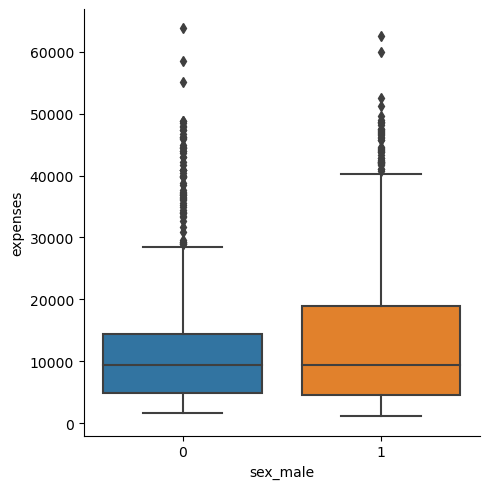

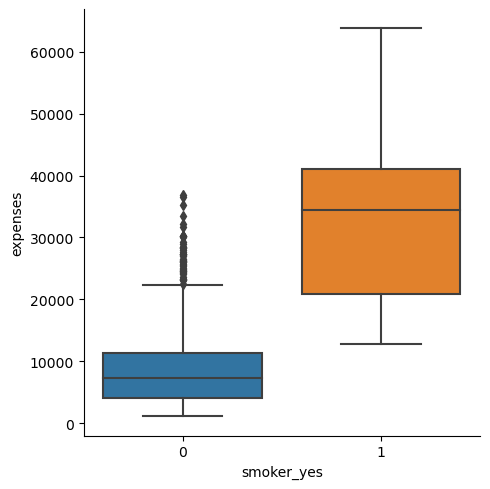

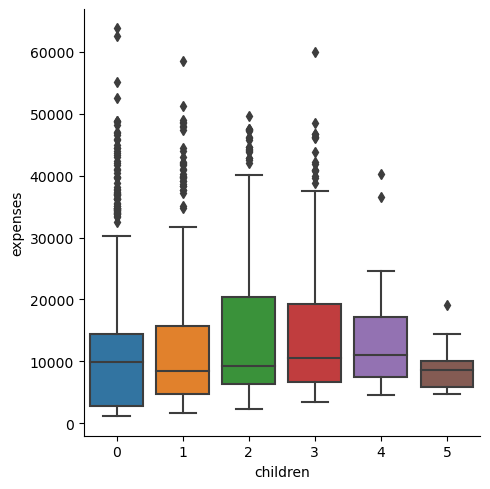

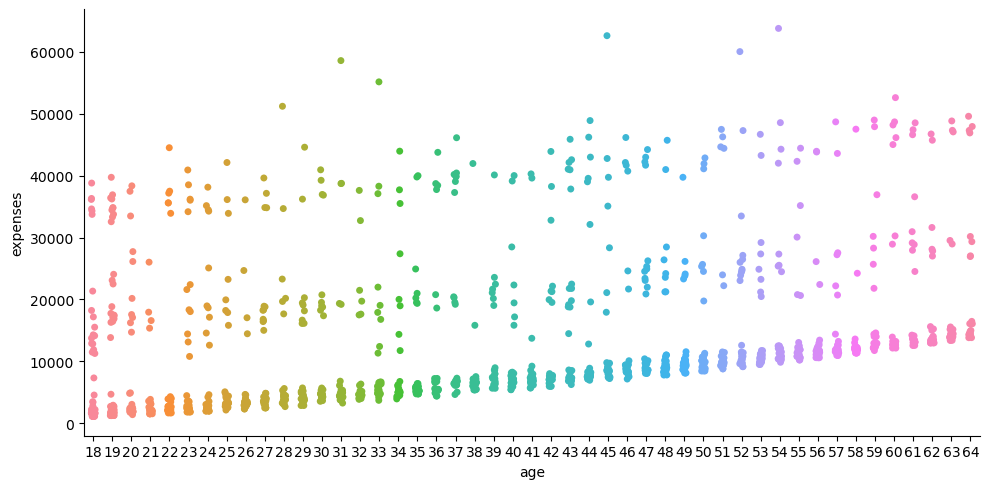

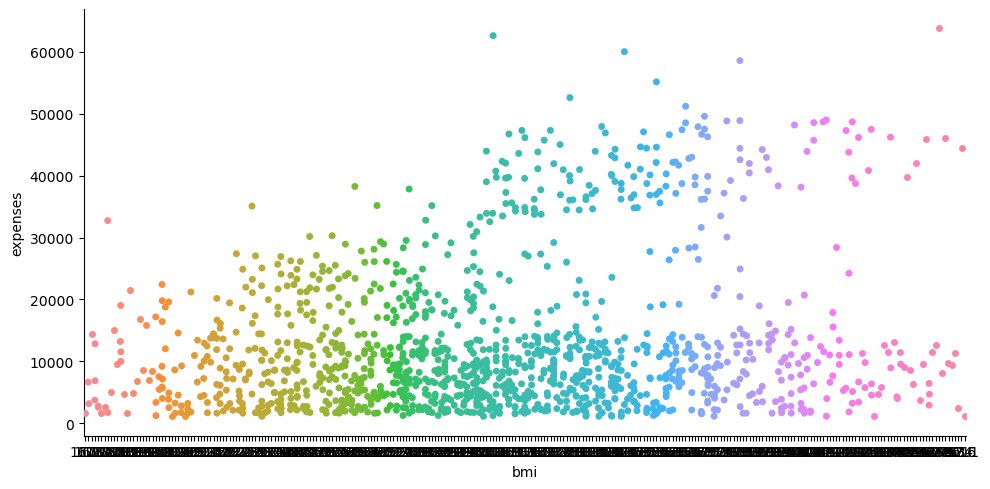

In [61]:
X = df.drop(columns=["expenses"],axis=1)
sns.catplot(data=df,x = "sex_male",y = "expenses",kind="box")
sns.catplot(data=df,x = "smoker_yes",y = "expenses",kind="box")
sns.catplot(data=df,x = "children",y = "expenses",kind="box")
sns.catplot(data=df,x = "age",y ="expenses",height=5,aspect=2)
sns.catplot(data=df,x = "bmi",y ="expenses",height=5,aspect=2)

As we can see in the plots, the features generates differences so we decide to keep them all.

In [62]:
X = df.drop(columns=["expenses"],axis=1)
Y = df["expenses"]
X = preprocessing.normalize(X,axis=0)
Y.to_numpy()

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

We will train our model with sklearn regression model library with polynomial features ranging from 1 to 3 to 
see which is better. We can clearly see that adding polynomial features of degree 2 will increase the accuracy.
We can also see that the RMSE is very high for all models, which we can say is normal since it's a model with a 
targeat feature with a lot of variabilty as seen in the boxplots, so reducing the error without causing any 
overfitting problems doesn't seem feaseable.

In [67]:
for i in range(1,4):
    poly = PolynomialFeatures(degree=i,include_bias=False)
    X_aux = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_aux, Y, random_state=0, train_size = .8)
    model = LinearRegression().fit(X_train, y_train) 
    predictions = model.predict(X_test)
    rms = mean_squared_error(y_test, predictions, squared=False)
    print(f'Accuracy for model with polynomial degree {i}:', model.score(X_test, y_test))
    print(f'Root square mean for polynomial with degree{i}:', rms)  
    

Accuracy for model with polynomial degree 1: 0.8000559125668045
Root square mean for polynomial with degree1: 5640.664431245448
Accuracy for model with polynomial degree 2: 0.880375951237772
Root square mean for polynomial with degree2: 4363.000165920493
Accuracy for model with polynomial degree 3: 0.8755705447950374
Root square mean for polynomial with degree3: 4449.7701735065775
